In [1]:
import json
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f = open('lotto_america_winning_nums.json', 'r')
data = json.load(f)

In [3]:
df = pd.DataFrame(data).transpose()
df.head()

,main_numbers,star_number,multiplier
"Wed, Dec 11, 2024","[4, 14, 30, 45, 50]",4,2x
"Mon, Dec 9, 2024","[15, 24, 29, 38, 51]",3,3x
"Sat, Dec 7, 2024","[7, 14, 31, 44, 46]",8,5x
"Wed, Dec 4, 2024","[10, 13, 32, 42, 44]",9,4x
"Mon, Dec 2, 2024","[1, 20, 37, 39, 47]",4,2x


In [4]:
df2 = pd.DataFrame(df)
ball_list = ['Ball 1', 'Ball 2', 'Ball 3', 'Ball 4', 'Ball 5']
df2[ball_list] \
    = pd.DataFrame(df.main_numbers.tolist(), index = df2.index)
df2 = df2.drop('main_numbers', axis=1)
cols = []
cols.extend(ball_list)
cols.append('star_number')
cols.append('multiplier')
df2 = df2[cols]
df2.rename(columns={'star_number': 'All Star Ball', 'multiplier' : 'Multiplier'}, inplace=True)
df2.head()

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,All Star Ball,Multiplier
"Wed, Dec 11, 2024",4,14,30,45,50,4,2x
"Mon, Dec 9, 2024",15,24,29,38,51,3,3x
"Sat, Dec 7, 2024",7,14,31,44,46,8,5x
"Wed, Dec 4, 2024",10,13,32,42,44,9,4x
"Mon, Dec 2, 2024",1,20,37,39,47,4,2x


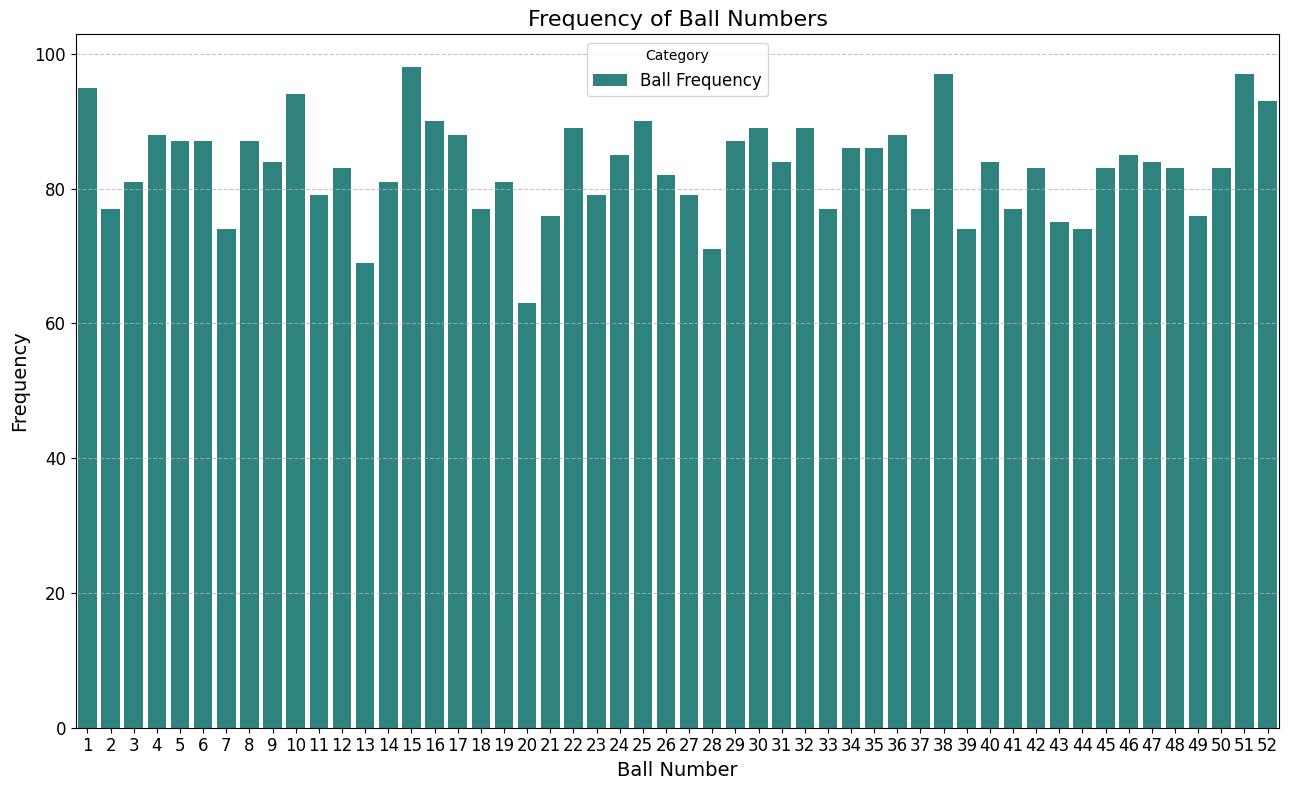

In [5]:
counts = df2[ball_list].values.flatten()
ball_counts = pd.Series(counts).value_counts().reset_index()
ball_counts.columns = ['Ball Number', 'Frequency']

# Create a new column for hue to categorize as "Ball Frequency"
ball_counts['Category'] = 'Ball Frequency'

# Create the plot
plt.figure(figsize=(13, 8))
sns.barplot(data=ball_counts, x='Ball Number', y='Frequency', hue='Category', dodge=False, palette="viridis")
plt.title("Frequency of Ball Numbers", fontsize=16)
plt.xlabel("Ball Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

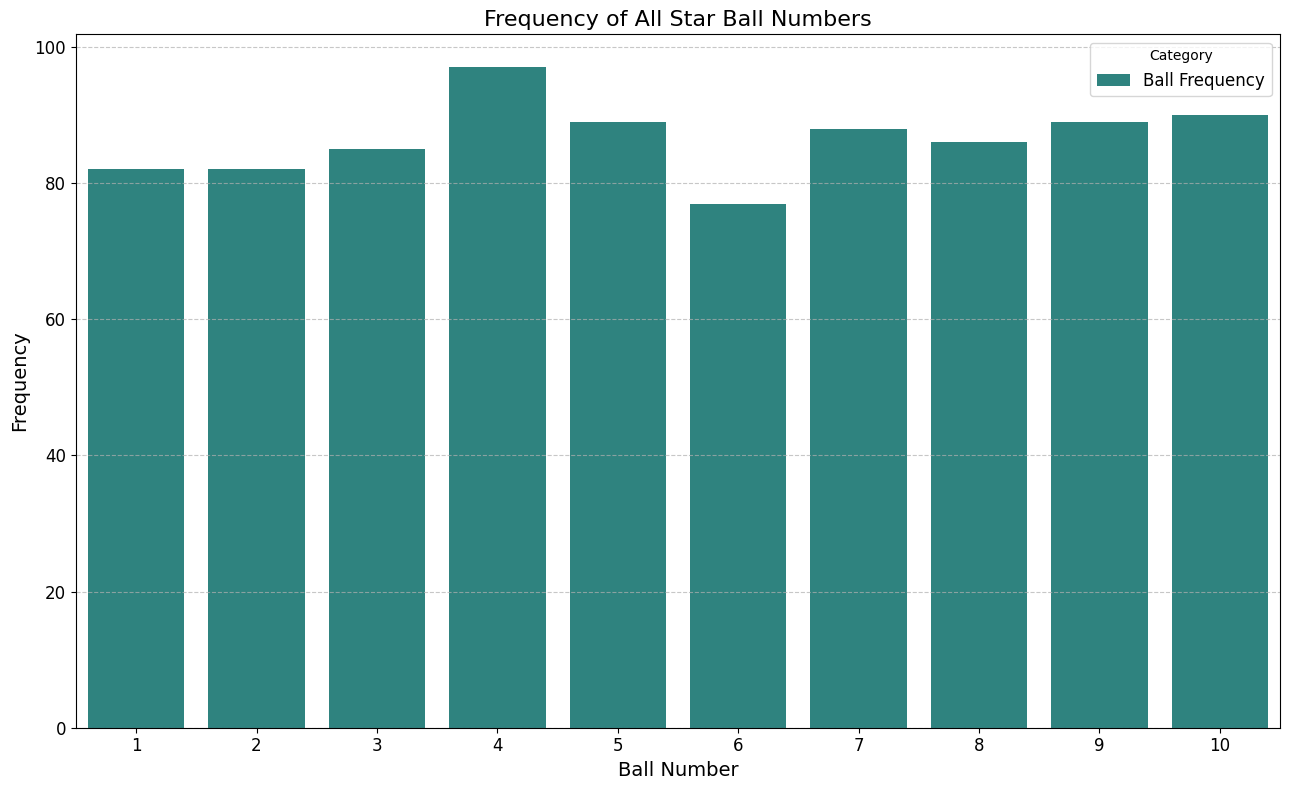

In [6]:
counts = df2['All Star Ball'].values
ball_counts = pd.Series(counts).value_counts().reset_index()
ball_counts.columns = ['Ball Number', 'Frequency']

# Create a new column for hue to categorize as "Ball Frequency"
ball_counts['Category'] = 'Ball Frequency'

# Create the plot
plt.figure(figsize=(13, 8))
sns.barplot(data=ball_counts, x='Ball Number', y='Frequency', hue='Category', dodge=False, palette="viridis")
plt.title("Frequency of All Star Ball Numbers", fontsize=16)
plt.xlabel("Ball Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
def count_even_odd(row):
    even_count = sum(num % 2 == 0 for num in row)
    odd_count = len(row) - even_count
    return pd.Series({"Even": even_count, "Odd": odd_count})


df_counts = df2[ball_list].apply(count_even_odd, axis=1)
df2['Even'] = df_counts['Even']
df2['Odd'] = df_counts['Odd']
df2.head()

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,All Star Ball,Multiplier,Even,Odd
"Wed, Dec 11, 2024",4,14,30,45,50,4,2x,4,1
"Mon, Dec 9, 2024",15,24,29,38,51,3,3x,2,3
"Sat, Dec 7, 2024",7,14,31,44,46,8,5x,3,2
"Wed, Dec 4, 2024",10,13,32,42,44,9,4x,4,1
"Mon, Dec 2, 2024",1,20,37,39,47,4,2x,1,4


In [8]:
# Create a 'Distribution' column combining Odd and Even counts
df2["Distribution"] = df2.apply(lambda x: f"{int(x['Odd'])} Odd, {int(x['Even'])} Even", axis=1)
distribution_counts = df2["Distribution"].value_counts(normalize=True) * 100

# Convert to DataFrame for plotting
distribution_df = distribution_counts.reset_index()
distribution_df.columns = ["Distribution", "Percentage"]
distribution_df

,Distribution,Percentage
0,"2 Odd, 3 Even",35.260116
1,"3 Odd, 2 Even",31.329480
2,"1 Odd, 4 Even",15.144509
3,"4 Odd, 1 Even",14.104046
4,"5 Odd, 0 Even",2.196532
5,"0 Odd, 5 Even",1.965318


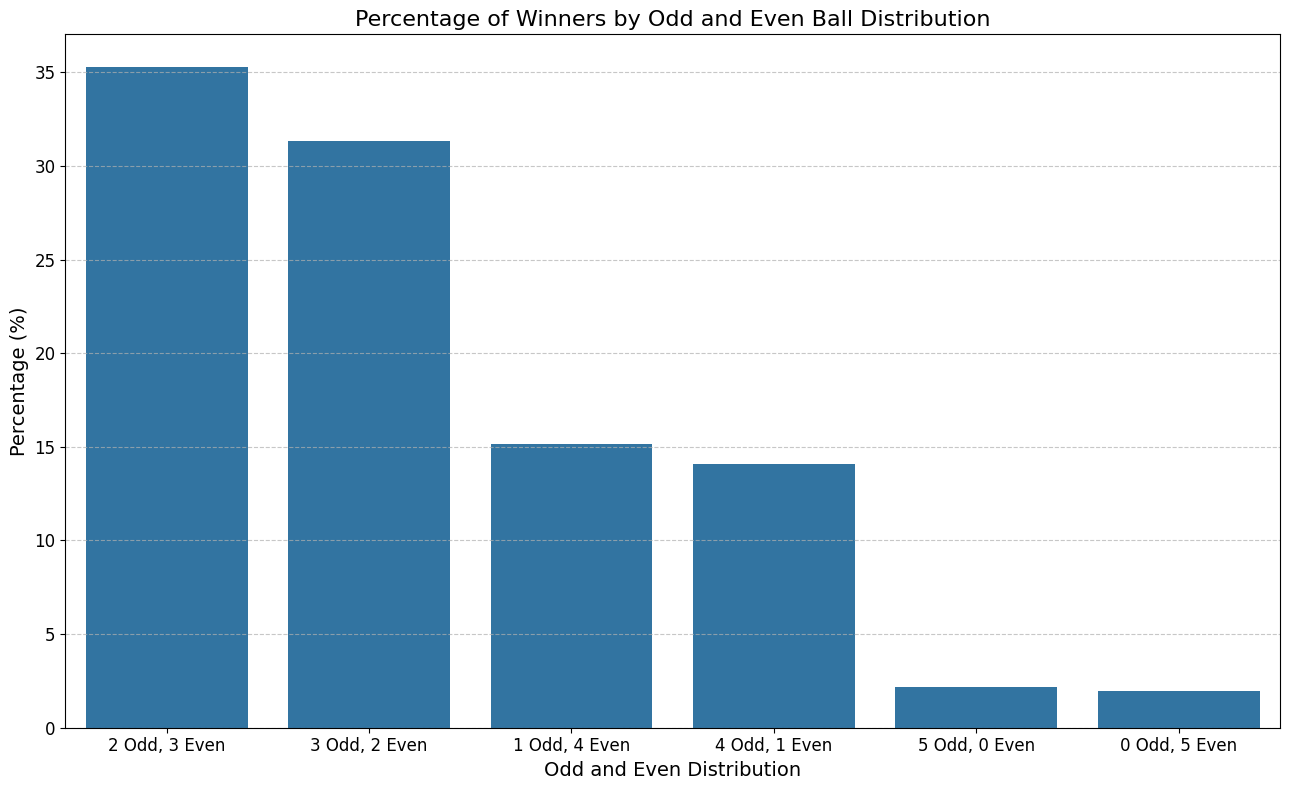

In [9]:
# Plot the results
plt.figure(figsize=(13, 8))
sns.barplot(data=distribution_df, x="Distribution", y="Percentage")
plt.title("Percentage of Winners by Odd and Even Ball Distribution", fontsize=16)
plt.xlabel("Odd and Even Distribution", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()